In [34]:
import numpy as np
from cmm import toy_data
import matplotlib.pyplot as pl
from scipy.signal import coherence
from cmm import spectral_funcs as sf
from importlib import reload
from cmm import cmm
from cmm import utils 
import jax.numpy as jnp
reload(toy_data)
reload(utils)
np.random.seed(0)
path = "/Users/ruttenv/Documents/code/cmm/results/"
t_ = 400
fs = 30
nperseg = 80
noverlap = int(0.8 * nperseg)
subn = 4
m = 2
noise = 0
xnt, ymt, xax = toy_data.make_toy_data(subn, t_, fs, m, nperseg, noise)
n, t = xnt.shape

### test projection

/Users/ruttenv/miniforge3/envs/cmm/lib/python3.11/site-packages/jax/_src/array.py:387: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self._value, dtype=dtype)


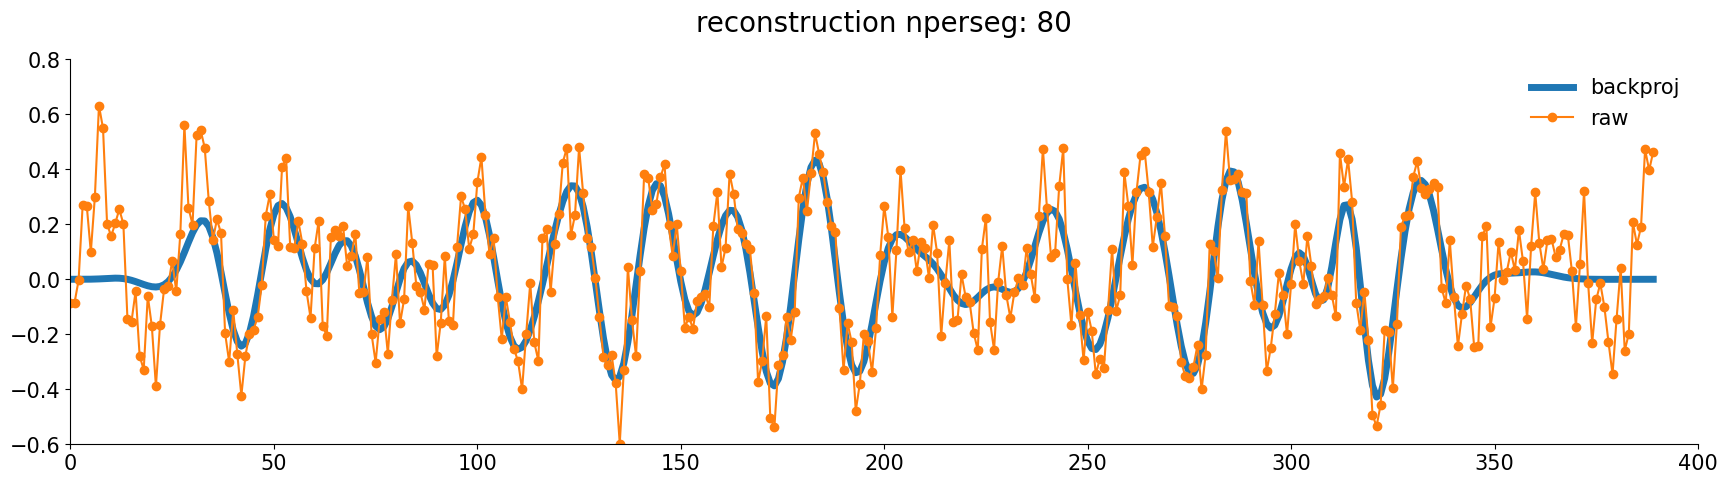

In [35]:
from cmm import cmm_funcs
reload(cmm_funcs)
reload(utils)
freq_minmax = [-np.inf, np.inf]
nperseg_ = 80
noverlap_ = int(0.8 * nperseg_)
valid_DFT_Wktf, valid_iDFT_Wktf = cmm_funcs.build_fft_trial_projection_matrices(
            t, nperseg=nperseg_, noverlap=noverlap_, fs=fs, freq_minmax=freq_minmax)

xnkf_coefs = np.tensordot(xnt, valid_DFT_Wktf, axes=(1, 1))
xntf_i = jnp.einsum('nkf,ktf->ntf', xnkf_coefs, valid_iDFT_Wktf)

n, t, f = xntf_i.shape
fmax = f
ind = 2
pl.figure(figsize=(21, 5))
pl.plot(xntf_i[ind,:,:fmax].sum(-1), lw=5, label="backproj")
pl.plot(xnt[ind], "-o", label="raw")
pl.legend(loc=1)
title_offset = 1.05
pl.title(f"reconstruction nperseg: {nperseg_}", fontsize=20, y=title_offset)
pl.savefig(path + f"reconstruction nperseg {nperseg}", bbox_inches="tight")

In [33]:
t_ = 400
fs = 30
nperseg = 80
noverlap = int(0.8 * nperseg)
subn = 4
m = 2
noise = 0
xnt, ymt, xax = toy_data.make_toy_data(subn, t_, fs, m, nperseg, noise)
n, t = xnt.shape
reload(sf)

coefs_xknf, freqs = sf.compute_spectral_coefs(
    xnt=xnt,
    fs=fs,
    nperseg=nperseg_,
    noverlap=noverlap_,
    freq_minmax=freq_minmax,
    return_onesided=True,
    detrend = False
)
reload(cmm_funcs)

coefs_xnkf_ = cmm_funcs.compute_spectral_coefs_by_hand(xnt=xnt,
    fs=fs,
    nperseg=nperseg_,
    noverlap=noverlap_,
    freq_minmax=freq_minmax,)
coefs_xknf_ = coefs_xnkf_.transpose([1,0,2])
coefs_xknf.shape, coefs_xknf_.shape
np.allclose(coefs_xknf, coefs_xknf_)
np.abs(coefs_xknf-coefs_xknf_)

# np.allclose(coefs_xknf, coefs_xknf_)


array([[[9.5367432e-07, 1.3291306e+01, 1.0176723e+01, ...,
         4.1310115e+00, 4.6397395e+00, 4.8033075e+00],
        [0.0000000e+00, 1.3399009e+01, 3.6438460e+00, ...,
         4.2799792e+00, 4.6541595e+00, 4.8022294e+00],
        [0.0000000e+00, 6.9396567e+00, 1.6894831e+01, ...,
         4.1467123e+00, 4.5874414e+00, 4.6532555e+00],
        ...,
        [4.7683716e-07, 2.2941067e+01, 1.4742001e+01, ...,
         8.3468251e-02, 2.2296622e-01, 2.0092475e-01],
        [9.5367432e-07, 2.9162518e+01, 1.3959725e+01, ...,
         4.8915833e-02, 7.9840064e-02, 2.5831598e-01],
        [9.5367432e-07, 3.1700699e+01, 1.3264936e+01, ...,
         9.5154785e-02, 1.6012385e-01, 1.2649083e-01]],

       [[0.0000000e+00, 7.7917895e+00, 1.0313921e+01, ...,
         4.3237305e+00, 4.3026133e+00, 3.7667382e+00],
        [4.7683716e-07, 9.9013119e+00, 1.1093726e+01, ...,
         3.9391701e+00, 3.9756238e+00, 3.9667306e+00],
        [0.0000000e+00, 1.7972279e+01, 4.0469294e+00, ...,
         5.326

In [ ]:
pxx, freqs = sf.estimate_spectrum(xnt, fs=fs, nperseg=nperseg, noverlap=noverlap, abs=True, alltoall=False)

cmap = pl.get_cmap('tab10')
for i in range(m):
    pl.plot(freqs, pxx[(i*subn):(i+1)*subn].T, color = cmap(i/m));

In [ ]:
reload(sf)
coh_xx, freq_ = sf.compute_coherence(
    xnt, xnt, fs=fs, nperseg=nperseg, noverlap=noverlap
)

coh_yy, freq_ = sf.compute_coherence(
    ymt, ymt, fs=fs, nperseg=nperseg, noverlap=noverlap
)

coh_yx, freq_ = sf.compute_coherence(
    ymt, xnt, fs=fs, nperseg=nperseg, noverlap=noverlap
)

In [ ]:
pl.figure(figsize = (8, 2))
pl.matshow(coh_yx[:,:,:10].mean(-1))
pl.title('coherence')
pl.xlabel('obersvations')
pl.ylabel('latents')
pl.colorbar(orientation = 'horizontal')

In [ ]:
freq_minmax = [-np.inf, np.inf]
reload(cmm)
xnkf_coefs, xnt_proj, xntf_proj = cmm.compute_coefs(
    xnt, nperseg=nperseg, noverlap=noverlap, fs=fs, freq_minmax=freq_minmax)

In [ ]:
reload(sf)
reload(cmm)
freq_minmax = [-np.inf, np.inf]
rs = []
for i in range(2):
    r = cmm.compute_clusters(
        xnt[(subn*i):subn*(i+1)], nperseg=nperseg, noverlap=noverlap, fs=fs, freq_minmax=freq_minmax)
    rs.append(r)

In [ ]:
for ind, r in enumerate(rs):
    eigvec_backproj_ft = r['eigvec_backproj_ft']
    ymt_ = np.array(eigvec_backproj_ft.mean(0)[None])
    coh_yx_, freq_ = sf.compute_coherence(
        ymt_, xnt, fs=fs, nperseg=nperseg, noverlap=noverlap
    )
    pl.figure(figsize = (8, 2))
    pl.pcolormesh(coh_yx_[:,:,:10].mean(-1))
    pl.yticks([])
    pl.xlabel('observations')
#     pl.ylabel(f'learnt latent: {ind}')
    pl.title(f'coherence with learnt latent {ind}')
    pl.colorbar(orientation = 'horizontal')

In [ ]:
pl.plot(eigvec_backproj_ft[:10].mean(0),'r')
pl.twinx()
pl.plot(eigvec_ft[:10].mean(0))

In [ ]:
r['eigvecs_p'].shape, r['iDWktf'].shape
eigvec_backproj_ft = jnp.einsum('ktf, fk->ft' , r['iDWktf'],r['eigvecs_p'])

In [ ]:
# sum over k

In [ ]:
r['eigvecs_p'].shape #

In [ ]:
pl.plot(r['eigvecs'][10])

In [ ]:
fmax = 30
pl.plot(r['eigvecs'][:fmax].mean(0), c = 'r')
pl.plot(xntf_proj[:1,:,:fmax].mean(-1).T)
# pl.plot(xntf_proj[1:2,:,:fmax].mean(-1).T)

In [ ]:
pl.plot(xnt_proj[:2].T)

### compute leading eigenvectors of pkkf and backproject

### compute backprojections

In [ ]:
reload(cmm)
nperseg = 80
noverlap = int(0.8 * nperseg)
freq_minmax = [-np.inf, np.inf]
xnkf_coefs, valid_DFT_Wktf, valid_iDFT_Wktf, DFT, xnt_proj = cmm.compute_coefs(
    xnt, nperseg=nperseg, noverlap=noverlap, fs=fs, freq_minmax=freq_minmax)
ind = 5
pl.figure(figsize = (21, 3))
pl.plot(xnt_proj[ind], lw = 5, label = 'backproj')
pl.plot(xnt[ind],'-o', label ='raw')
pl.legend(loc = 1)
title_offset = 1.05
pl.title(f"reconstruction nperseg: {nperseg}", fontsize=20, y=title_offset)
pl.savefig(path + f"reconstruction nperseg {nperseg}", bbox_inches="tight")

In [ ]:
xnt_proj

In [ ]:
pl.plot(xnt[0])

In [ ]:
pl.plot(rv[1][:8].T)

In [ ]:
%%timeit 
n = xnt.shape[0]
pkk_f = np.einsum('ijk, ilk->jlk', xnkf_coefs, np.conj(xnkf_coefs))/n

In [ ]:
%%timeit 
n = xnt.shape[0]
pkk_f = jnp.einsum('ijk, ilk->jlk', xnkf_coefs, np.conj(xnkf_coefs))/n

In [ ]:
import jax.numpy as jnp
from jax.lax import scan
from cmm.utils import foldxy

In [ ]:
n, k, f = xnkf_coefs.shape
init = np.zeros([k, k, f]).astype("complex64")
fxy = lambda v, y: foldxy(v, y)
xnkf_coefs = jnp.array(xnkf_coefs)
print("scanning beginning")

In [ ]:
%%timeit 
pkkf, _ = scan(fxy, init, (xnkf_coefs, xnkf_coefs))  # average over n
pkkf /= n

In [ ]:
np.allclose(pkkf, pkk_f)

In [ ]:
reload(cmm)

t = 500
fs = 50
nperseg = 50
noverlap = int(0.8 * nperseg)
subn = 5
m = 3
xnt, ymt, xax = make_toy_data(subn, t, fs, m, nperseg)

nperseg = 100
noverlap = int(0.8 * nperseg)
freq_minmax = [-np.inf, np.inf]
xnkf_coefs, valid_DFT_Wktf, valid_iDFT_Wktf, DFT = cmm.compute_coefs(
    xnt, nperseg=nperseg, noverlap=noverlap, fs=fs, freq_minmax=freq_minmax)
xnt_proj = np.einsum("ijk,lik->lj",valid_iDFT_Wktf, xnkf_coefs).real


ind = 5
pl.plot(xnt_proj[ind], lw = 5)
pl.plot(xnt[ind],'-o')

In [ ]:
pl.imshow(valid_DFT_Wktf[0].real)

In [ ]:
def myrfft(xnt, fs=1):
    from cmm import utils
    DFT_tw, freqs = utils.get_fftmat(t, fs=fs)
    xnf = (DFT_tw.T@xnt.T).T
    return xnf

def myirfft(xnf, t, fs=1):
    from cmm import utils
    n, f = xnf.shape
    DFT_tw, freqs = utils.get_fftmat(t, fs=fs)
    iDFT_tw = 1/(DFT_tw/f)
    xnt = (iDFT_tw@xnf.T).T
    return xnt

n, t = xnt.shape
xnf = myrfft(xnt)
ixnt = myirfft(xnf, t)

xnf_ = np.fft.rfft(xnt)
ixnt_ = np.fft.irfft(xnf_)

print(np.allclose(ixnt_, xnt))
print(np.allclose(ixnt, xnt))
print(np.allclose(xnf, xnf_))

In [ ]:
np.diag(((irDFT@rDFT.T).real)).sum()

In [ ]:
t = xnt.shape[-1]
rDFT = np.fft.rfft(np.eye(t))
f = rDFT.shape[1]
irDFT = 1/rDFT/(f)

np.allclose((irDFT@rDFT.T@xnt.T).T, xnt), np.allclose(irDFT@rDFT.T,np.eye(t))


In [ ]:
t = xnt.shape[-1]
DFT = np.fft.fft(np.eye(t))
iDFT = 1/DFT/t

np.allclose((iDFT@DFT@xnt.T).T, xnt), np.allclose(iDFT@DFT.T,np.eye(t))


In [ ]:
from numpy.fft import rfft, irfft
np.allclose(irfft(rfft(xnt)), xnt)
np.allclose(myirfft(myrfft(xnt)), xnt)

In [ ]:
for i in range(m):
    pl.figure(figsize = (15 , 3))
    pl.plot(rv[i][:10].mean(0).T);
    pl.figure(figsize = (15 , 3))
    pl.plot(back_proj[i*subn:subn*(i+1),:,:10].mean(-1).T);

In [ ]:
valid_DFT_Wktf.shape

In [ ]:
pkkf.shape

In [ ]:
tt = pkkf.shape[0]
V = [eigh(m, subset_by_index=[tt - 1, tt - 1]) for m in pkkf.transpose([2,0,1])]
eigvals = np.array(list(zip(*V))[0])
eigvecs = np.array(list(zip(*V))[1]).squeeze()

In [ ]:
eigvecs.shape #k by w

In [ ]:
# eigvecs

In [ ]:
for i in range(m):
    pl.figure(figsize = (21, 3))
#     pl.plot(rv[i].mean(0))
    pl.plot(rv[i][5].T)

In [ ]:
pl.figure(figsize = (21, 3))
pl.plot(xnt[:subn].T);

In [ ]:
coh_yx, freq_ = sf.compute_coherence(
    eigvecs[:10,:,0], xnt, fs=fs, nperseg=nperseg, noverlap=noverlap
)

In [ ]:
ind = 4
pl.plot(coh_yx[ind,:,ind])

In [ ]:
pl.figure()
pl.plot(xnt[:subn].T);

In [ ]:
pl.plot(eigvecs[0])


In [ ]:
path = "/Users/ruttenv/Documents/code/cmm/results/"
mf = 5
toffset = 1.05
pl.figure(figsize=(5, 5))
pl.imshow(coh_xx[:, :, :mf].mean(-1))
ratio = 1
pl.colorbar(fraction=0.046*ratio, pad=0.04)
pl.xlabel('observations')
pl.ylabel('observations')
pl.tight_layout()
pl.title("coherence matrix", fontsize=20, y = toffset)
pl.savefig(path + "coherence_xx", bbox_inches="tight")

mf = 5
pl.figure(figsize=(5, 5))
pl.imshow(coh_yx[:, :, :mf].mean(-1))
pl.colorbar(location="bottom",)
pl.ylabel('cluster means')
pl.xlabel('observations')
pl.tight_layout()
pl.title("cross coherence yx", fontsize=20, y = toffset)
pl.savefig(path + "coherence_yx", bbox_inches="tight")


In [ ]:
mf = 5
pl.figure(figsize = (5, 5))
pl.imshow(coh_xx[:,:,:mf].mean(-1))
pl.colorbar()
pl.tight_layout()

In [ ]:
reload(sf)
freq, coh = coherence(xnt[0:1],xnt, fs=fs, \
                      nperseg=nperseg, \
                      noverlap=noverlap)


coh_, freq_ = sf.compute_coherence(xnt, xnt, fs=fs, \
                                   nperseg=nperseg, \
                                   noverlap=noverlap)

print(coh_.shape, coh.shape)

In [ ]:
np.allclose(coh[:,0],coh_[0,:,0])

In [ ]:

ind = 2
pl.figure(figsize = (21, 3))
pl.plot(coh[:,:mf].mean(-1), 'o-',ms = 10)
pl.plot(coh_[0,:,:mf].mean(-1), 'o-', alpha = .8)


In [ ]:

pxx, freqs = sf.estimate_spectrum(
    xnt, xnt, fs=fs, nperseg=nperseg, noverlap=noverlap, abs=True, detrend=False, scaling = 'density'
)

nn = pxx.shape[0]
pxx_ = pxx[np.arange(nn), np.arange(nn)]
pxx = (pxx/pxx_[None])**2
freq, coh = coherence(xnt[:1],xnt, fs=fs, nperseg=nperseg, noverlap=noverlap, detrend = False)
coh.shape

In [ ]:
fig, axs = pl.subplots(nrows = 2, figsize = (21, 10), sharex = True)
for i in range(m):
    freq, coh = coherence(ymt[i],xnt, fs=fs, nperseg=nperseg, noverlap=noverlap, detrend = False)
    axs[0].plot(coh[:,:10].mean(-1),'o-', lw = 3, ms = 10)
    axs[1].plot(coh[:,].mean(-1),'o-', lw = 3, ms = 10)

In [ ]:
m

In [ ]:
# fig, axs = pl.subplots(nrows = m, ncols = 2, figsize = (21, 4*m))
# for ind in range(3):
#     axs[ind,0].plot(ymt[ind], lw = 4, alpha = .8)
#     axs[ind,1].plot(xnt[(ind*n):(ind+1)*n].T)
#     axs[ind,0].set_title(f'cluster mean {ind}')
#     axs[ind,1].set_title(f'observations {ind}')
# pl.tight_layout()